# Introduction to differential calculus

In [ ]:
# Library om YouTube videos te importeren 

from IPython.display import YouTubeVideo, Image

For the next few weeks you will learn about one of the most powerful, game-changing branches of machine learning today - the branch of deep learning, or artificial neural networks. The purpose of this notebook is to introduce you to the underlying concepts of neural networks and deep learning. Two of the most fundamental aspects of training artificial neural networks are **gradient descent** and **backpropagation**. In this and the next notebook you will learn the math behind these concepts and see how they are used in simple optimization, regression, and classification problems. These are the last math-intense notebooks you will study, as from next week on you will be focussing on the practical applications of deep learning. However, it is important that you understand these mathematical concepts, so take your time to understand them!

## 1 A brief introduction to differential calculus

### 1.1 The derivative / gradient of a function
Simply put, the derivative (also called the "slope" or the "gradient") of a function, is the **rate of change of the function with respect to an independent variable, when the independent variable changes by an extremely small amount**. Let us assume we have a function $f(x)$ with one independent variable $x$. When $x$ changes by a certain amount $\delta x$, then the value of the function changes from initially $f(x)$ to $f(x + \delta x)$. The **rate of change** of the function with respect to $x$ is then the change in the function divided by the change in the independent variable, or $\frac{f(x + \delta x) - f(x)}{\delta x}$. Now let us assume $\delta x$ is an extremely tiny amount (so tiny, it is in fact almost zero). We write this as follows: $\lim_{\delta x \to 0} \frac{f(x + \delta x) - f(x)}{\delta x}$.

This is then the definition of the gradient of the function $f(x)$ with respect to $x$. Mathematically, we write the gradient as $\frac{dy}{dx}$ or $f'(x)$. 

This will become clearer with a few examples. First, let us make a function in Python that calculates the gradient of any function. Then, we will calculate the gradient for many different functions and see what this looks like.

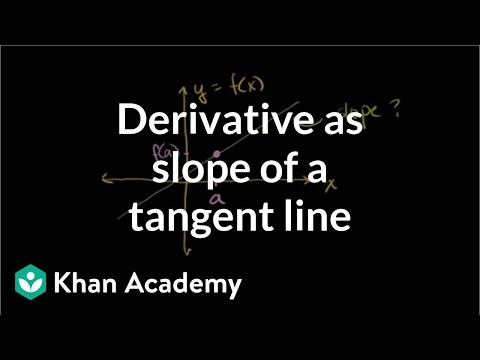

In [ ]:
YouTubeVideo("ANyVpMS3HL4", width=800, height=500)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def gradient(f, x, limits, plot=True, print_grads=True, δ_x=0.0001):
    '''Here, f is a mathematical function,
    x is the point at which we want to calculate the derivative,
    limits is a tuple of starting and ending point at which to plot the function (only necessary when plotting),
    plot says whether or not to plot the gradients,
    print_grads says whether or not to print the results,
    δ_x is the amount by which we change the independent variable.'''
    
    import numpy as np
    import matplotlib.pyplot as plt
    
    # We calculate the gradient
    grad = ( f(x + δ_x) - f(x) ) / (δ_x) 
    
    if plot:
        # Plot the function
        plot_x = np.linspace(limits[0], limits[1], num=500)
        plot_y = f(plot_x)

        plt.plot(plot_x, plot_y)

        # Plot two vertical lines showing the change in x
        plt.axvline(x, color='red', linestyle='dashed')
        try:
            plt.axvline(x + δ_x, color='red', linestyle='dashed')
        except:
            pass

        # Plot a line showing the change in the function
        plt.axline(xy1=(x, f(x)), slope=grad, label="Tangent line", color='g', linestyle='dashed')

        plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

        plt.show()
    
    if print_grads:
        # Print the value of the gradient
        print(f"The gradient evaluated at point x={x} when x changes by {δ_x} is {grad}.")
    
    # Return the gradient
    return grad

#### Example 1: The gradient of the function $y = x^2$ at the point x=1

First, let us start off with a large value of $\delta x$.

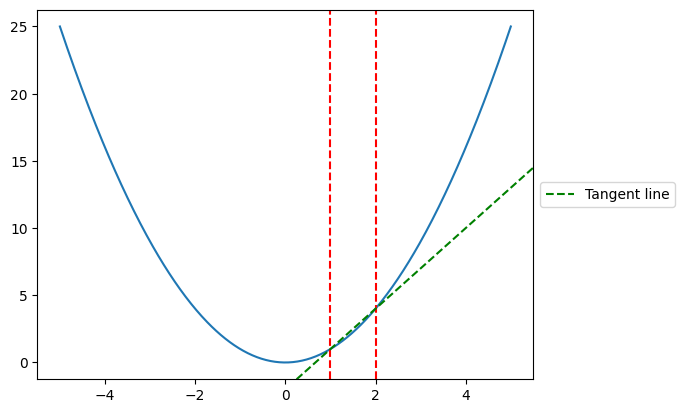

The gradient evaluated at point x=1 when x changes by 1 is 3.0.


In [ ]:
# Define the function

def y1(x):
    return x ** 2

grad1 = gradient(y1, 1, (-5, 5), δ_x=1)

Now, let us reduce the value of $\delta_x$ until it becomes almost zero.

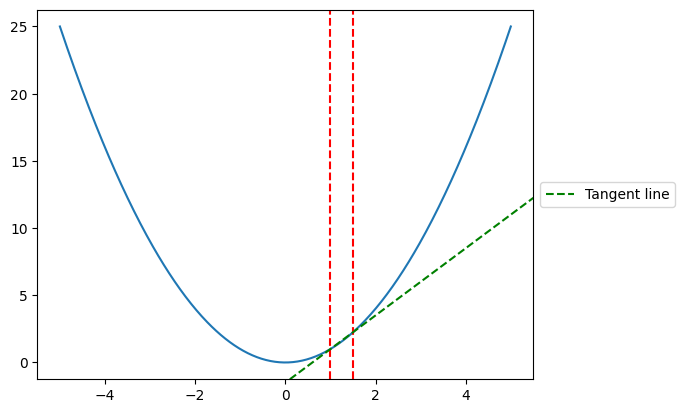

The gradient evaluated at point x=1 when x changes by 0.5 is 2.5.


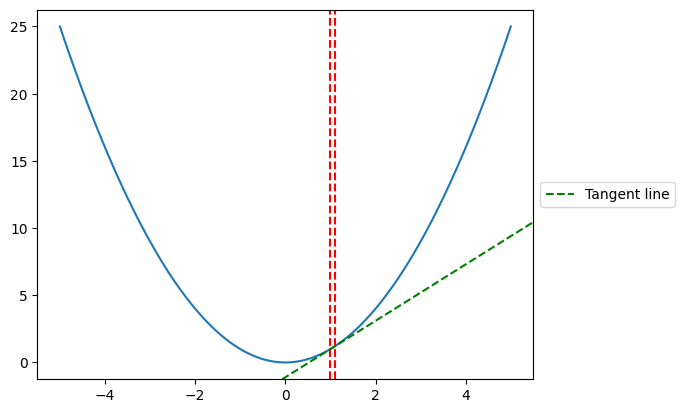

The gradient evaluated at point x=1 when x changes by 0.1 is 2.100000000000002.


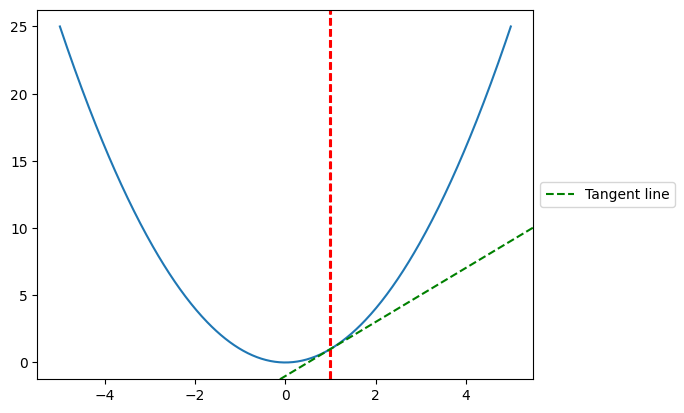

The gradient evaluated at point x=1 when x changes by 0.01 is 2.0100000000000007.


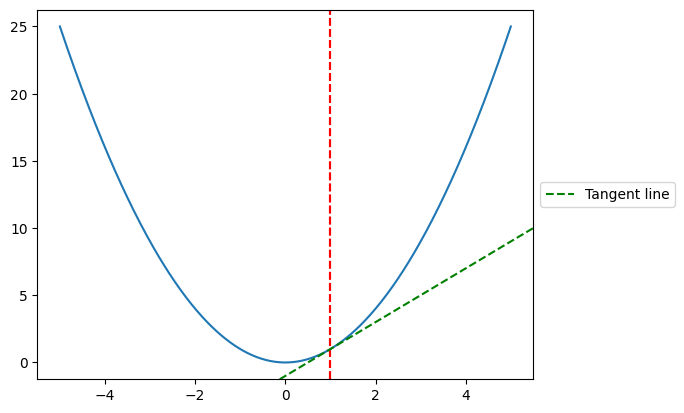

The gradient evaluated at point x=1 when x changes by 0.001 is 2.0009999999996975.


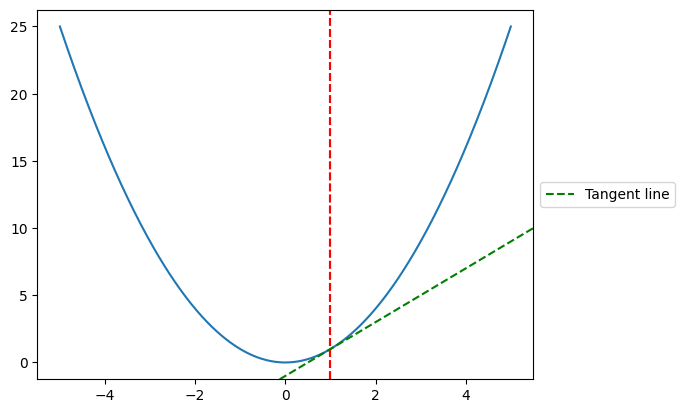

The gradient evaluated at point x=1 when x changes by 1e-06 is 2.0000009999243673.


In [ ]:
grad1 = gradient(y1, 1, (-5, 5), δ_x=0.5)

grad1 = gradient(y1, 1, (-5, 5), δ_x=0.1)

grad1 = gradient(y1, 1, (-5, 5), δ_x=0.01)

grad1 = gradient(y1, 1, (-5, 5), δ_x=0.001)

grad1 = gradient(y1, 1, (-5, 5), δ_x=0.000001)

As $\delta x$ gets smaller and smaller, we begin to converge on the true value of $\frac{dy}{dx}$ for the function $y = x^2$ at $x = 1$. Can you see what that is?

#### Example 2: The gradient of the function $y = x^2$ at the point x=-2

In [ ]:
def y2(x):
    return x ** 2

We will show what the gradient is by directly plugging in a very small value of $\delta x$, but I advise you to play around with different values of $\delta x$ to see how the value converges.

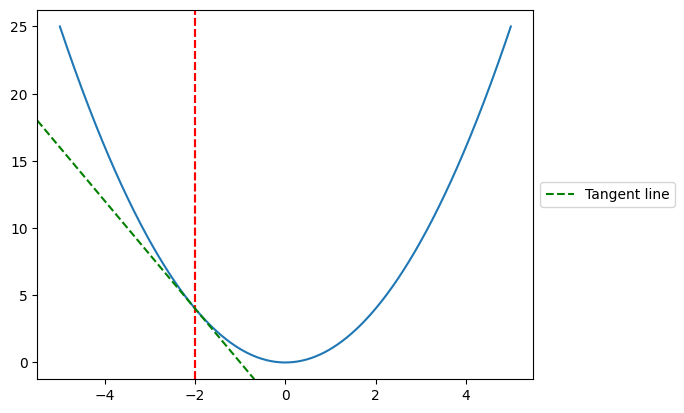

The gradient evaluated at point x=-2 when x changes by 1e-05 is -3.999990000025377.


In [ ]:
grad2 = gradient(y2, -2, (-5, 5), δ_x=0.00001)

#### Question: We have seen that the value of $\frac{dy}{dx}$ for the function $y = x^2$ was $2$ when $x$ was $1$ and was $-4$ when $x$ was $-2$. Plug in different values for $x$ for this same function. What gradients do you calculate? Do you see a pattern emerging?

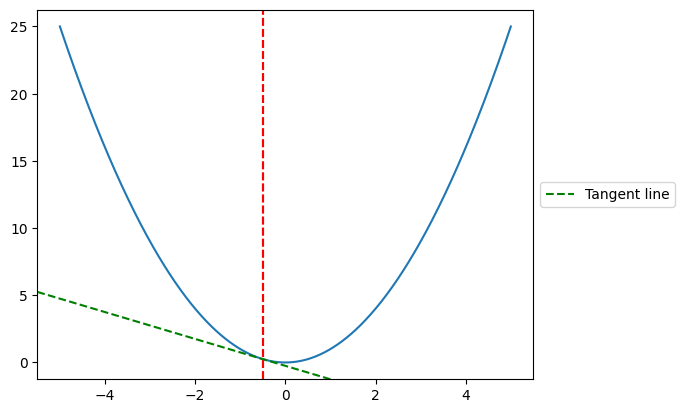

The gradient evaluated at point x=-0.5 when x changes by 1e-05 is -0.9999900000001726.


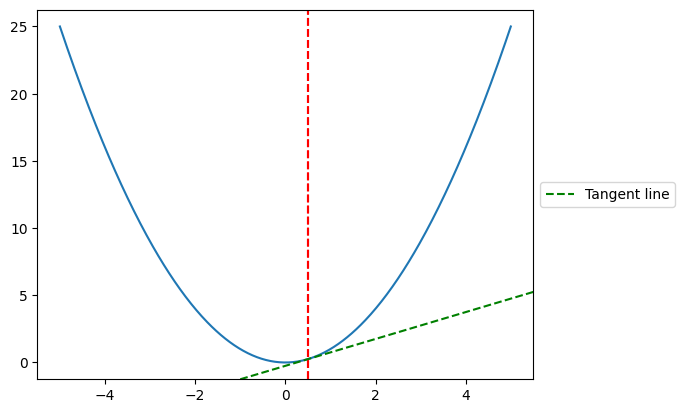

The gradient evaluated at point x=0.5 when x changes by 1e-05 is 1.0000099999962764.


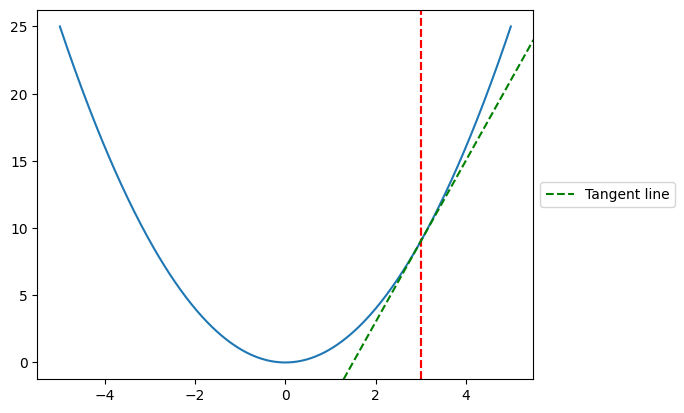

The gradient evaluated at point x=3 when x changes by 1e-05 is 6.000009999951316.


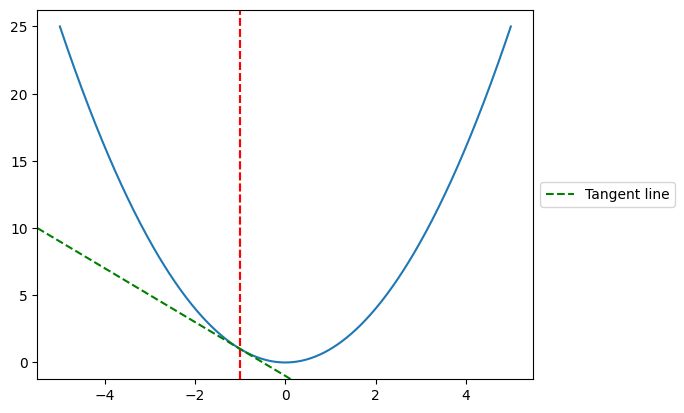

The gradient evaluated at point x=-1 when x changes by 1e-05 is -1.9999899999900703.


In [ ]:
## Your code here

grad_test = gradient(y2, -0.5, (-5, 5), δ_x=0.00001)
grad_test = gradient(y2, 0.5, (-5, 5), δ_x=0.00001)
grad_test = gradient(y2, 3, (-5, 5), δ_x=0.00001)
grad_test = gradient(y2, -1, (-5, 5), δ_x=0.00001)

We see that the gradient at point $x$ is $2x$.

#### Example 3: The gradient of the function $y = x^3$ at the point x=4
One last example.

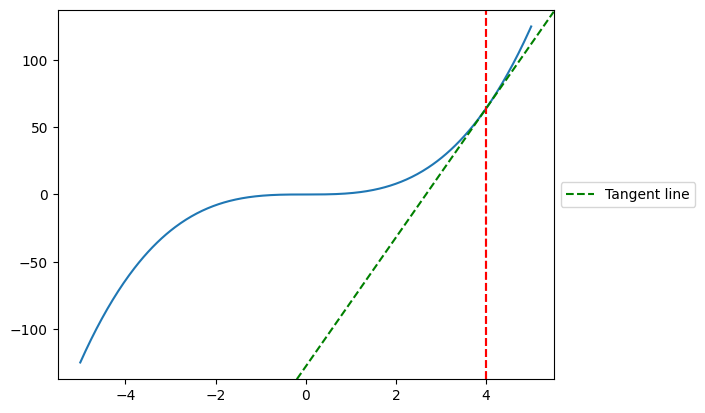

The gradient evaluated at point x=4 when x changes by 1e-06 is 48.00001200067072.


In [ ]:
def y3(x):
    return x ** 3

grad3 = gradient(y3, 4, (-5, 5), δ_x=0.000001)

#### Question: Use different functions of the form $y=x^n$, where $n$ is any number. Use the code above to calculate  $\frac{dy}{dx}$ for these functions at different values of $x$. What gradients do you calculate? Can you verify that for any value of $x$ and $n$, you see that  $\frac{dy}{dx} = n x^{n-1}$?

In [ ]:
## Your code here

# Play around with different functions here and calculate gradient at different points.

Let us calculate the value of the gradient of a function at several different points on the function, and plot the result. Let's see what this looks like for the function $y = x^2$

In [ ]:
xx = np.linspace(-5, 5, 500)

yy = y1(xx)
grads_xx = gradient(y1, xx, (-5, 5), plot=False, print_grads=False, δ_x=0.000001)

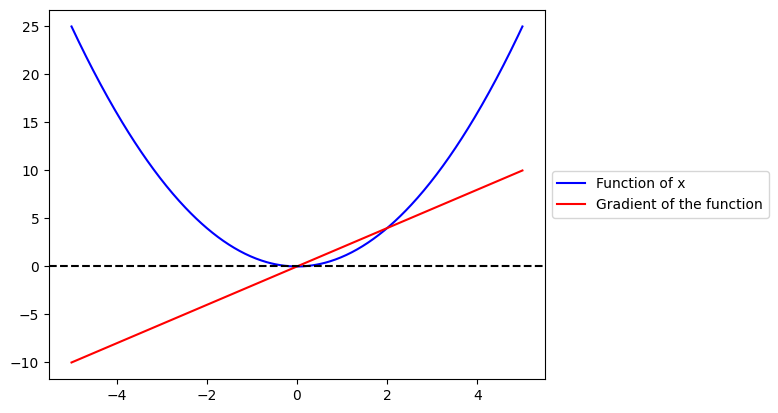

In [ ]:
plt.plot(xx, yy, 'b', label="Function of x")
plt.plot(xx, grads_xx, 'r', label="Gradient of the function")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.axhline(0, color='black', linestyle='dashed') # Showing the x axis

plt.show()

#### Question: Use different functions of the form $y=x^n$, where $n$ is any number. Calculate the gradients of these functions at several different points and then plot the gradient in a different color (use the code above as an example). Do you see a pattern emerging?

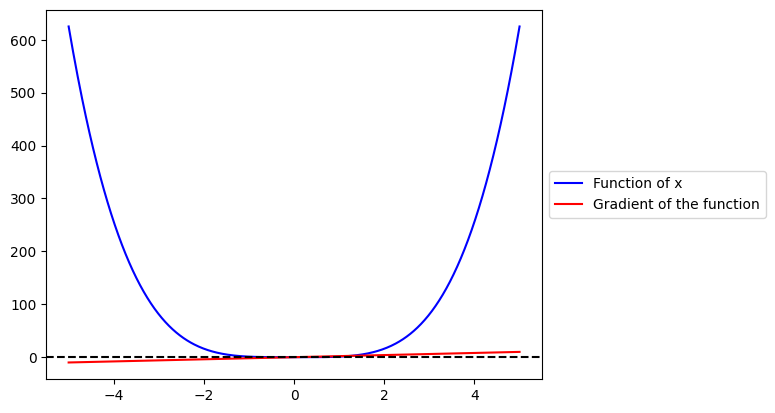

In [ ]:
## Your code here

# Play around with different functions here and calculate gradient at different points.

# For example
xx = np.linspace(-5, 5, 500)

def yt(x):
    return x ** 4

yy = yt(xx)
grads_xx = gradient(y2, xx, (-5, 5), plot=False, print_grads=False, δ_x=0.000001)

plt.plot(xx, yy, 'b', label="Function of x")
plt.plot(xx, grads_xx, 'r', label="Gradient of the function")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.axhline(0, color='black', linestyle='dashed') # Showing the x axis

plt.show()

#### Question: What is the derivative of the function $y = \sqrt{x}$?

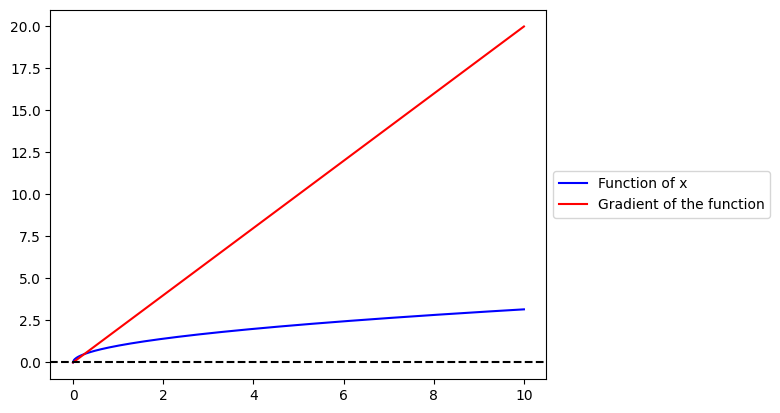

In [ ]:
## Your code here

xx = np.linspace(0, 10, 500)

def yt(x):
    return np.sqrt(x)

yy = yt(xx)
grads_xx = gradient(y2, xx, (-5, 5), plot=False, print_grads=False, δ_x=0.000001)

plt.plot(xx, yy, 'b', label="Function of x")
plt.plot(xx, grads_xx, 'r', label="Gradient of the function")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.axhline(0, color='black', linestyle='dashed') # Showing the x axis

plt.show()


### 1.2 Positive, negative and zero gradients
Hopefully you have played around with the above code enough by now to have realized that the value of the gradient at a point is **positive** if the function is **increasing** in value at that point, and **negative** if the function is **decreasing** in value at that point. Another way of seeing the gradient, is that it is the **slope of the tangent line** at a point. If I draw a tangent line to the function $f(x)$, and if the equation of this tangent line is $y = mx + c$, then $m$ is the gradient at the point that I draw the tangent.

Now, why is this important? The gradient of the function tells you whether the function is increasing or decreasing, but it also tells you if the function is **neither increasing nor decreasing**, i.e. when the gradient is 0. If the function is neither increasing nor decreasing at a certain point, this could mean one of 3 things:

1. The function is a straight, horizontal line. It never increases or decreases.
2. The point at which the gradient is evaluated is a **minima**. The function was first decreasing, and after this point it will increase again.
3. The point at which the gradient is evaluated is a **maxima**. The function was first increasing, and after this point it will decrease again.

The last two possibilities are especially interesting to us. These points are extreme values of the function. Finding the minimas or maximas of certain functions are useful in optimization problems, and lay the foundations of the **gradient descent** algorithm, which is in turn the basis of neural networks.

Note that we have been looking at functions of the form $y = x^n$ so far, but differential calculus can apply to any function, as long as it is **continuous** (i.e. there are no sharp discontinuities anywhere in the function). See the gif below for an example of the gradient calculated at different points in the function $y = x \sin(x^2) + 1$

![Gradient of a function](https://upload.wikimedia.org/wikipedia/commons/2/2d/Tangent_function_animation.gif)

## 2 The rules of differentiation

### 2.1 The derivative of specific functions (differentiation cheat sheet)

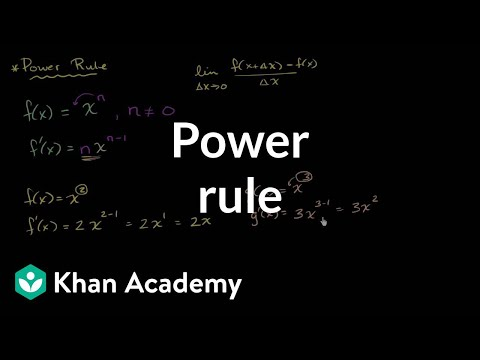

In [ ]:
YouTubeVideo("bRZmfc1YFsQ", width=800, height=500)

See this [link](https://www.dummies.com/article/academics-the-arts/math/calculus/calculus-ii-for-dummies-cheat-sheet-208670/) for the derivative of several common functions (you only need to see the section on common derivatives for now). Included are polynomial functions, exponential and logarithmic functions, trigonometric functions, etc. It is not necessary to memorize these derivatives, but you are encouraged to play around with these functions, plot them, calculate their derivatives, and verify these rules for yourself. Let us take one of the functions as an example: $y = \ln(x)$

According to the cheat sheet, its derivative must be $\frac{dy}{dx} = \frac{1}{x}$. Let us plot this to verify. (Note: we have to play around a bit with the limits of plotting to make the graphs clearer).

In [ ]:
def y4(x):
    return np.log(x) # This is the same as ln(x), or log with the base "e" where e = 2.718 (a special number)

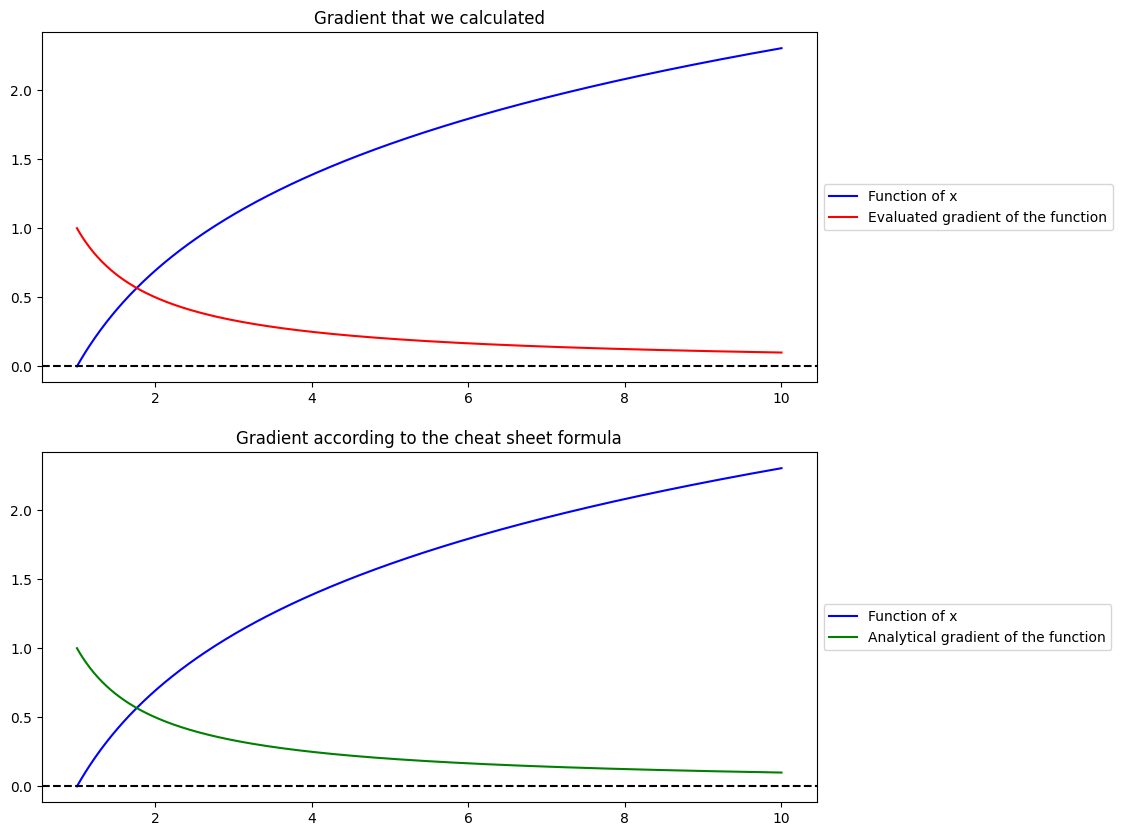

In [ ]:
xx = np.linspace(1, 10, 500)

yy = y4(xx)
grads_xx = gradient(y4, xx, (-5, 5), plot=False, print_grads=False, δ_x=0.000001)


plt.figure(figsize=(10,10))
plt.subplot(2, 1, 1)

# First we plot the function and the derivative that we evaluated
plt.plot(xx, yy, 'b', label="Function of x")
plt.plot(xx, grads_xx, 'r', label="Evaluated gradient of the function")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.axhline(0, color='black', linestyle='dashed') # Showing the x axis
plt.title("Gradient that we calculated")

plt.subplot(2, 1, 2)

# Now we plot the function and the analytical derivate according to the cheat sheet
yy_analytic = 1 / xx

plt.plot(xx, yy, 'b', label="Function of x")
plt.plot(xx, yy_analytic, 'g', label="Analytical gradient of the function")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.axhline(0, color='black', linestyle='dashed') # Showing the x axis
plt.title("Gradient according to the cheat sheet formula")

plt.show()

#### Question: What is the derivative of the function $y = \sin(x)$? Can you show this graphically? Can you show that it is the same as the analytical gradient according to the cheat sheet? Use the code above as an example.

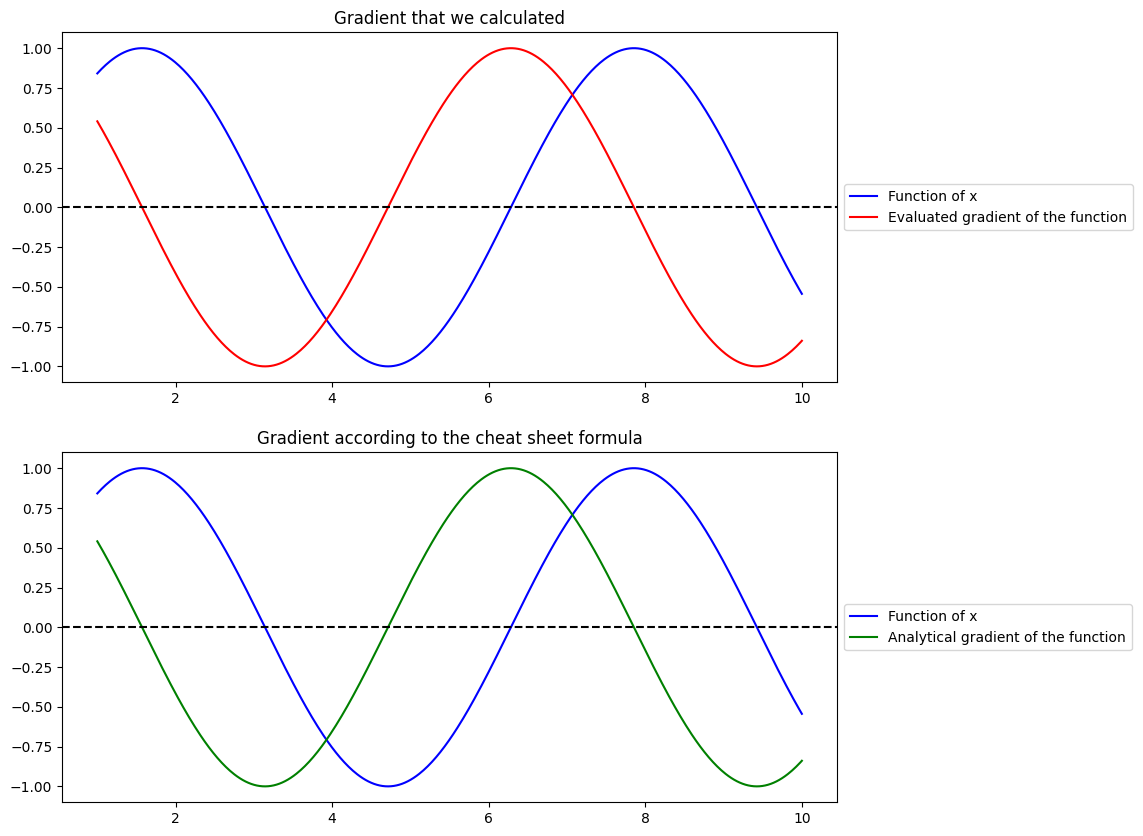

In [ ]:
## Your code here

def yt(x):
    return np.sin(x)

xx = np.linspace(1, 10, 500)

yy = yt(xx)
grads_xx = gradient(yt, xx, (-5, 5), plot=False, print_grads=False, δ_x=0.000001)


plt.figure(figsize=(10,10))
plt.subplot(2, 1, 1)

# First we plot the function and the derivative that we evaluated
plt.plot(xx, yy, 'b', label="Function of x")
plt.plot(xx, grads_xx, 'r', label="Evaluated gradient of the function")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.axhline(0, color='black', linestyle='dashed') # Showing the x axis
plt.title("Gradient that we calculated")

plt.subplot(2, 1, 2)

# Now we plot the function and the analytical derivate according to the cheat sheet
yy_analytic = np.cos(xx)

plt.plot(xx, yy, 'b', label="Function of x")
plt.plot(xx, yy_analytic, 'g', label="Analytical gradient of the function")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.axhline(0, color='black', linestyle='dashed') # Showing the x axis
plt.title("Gradient according to the cheat sheet formula")

plt.show()


### 2.1 Linearity
Differentiation is a **linear operation**. Mathematically speaking, this means that if we have two functions, $f(x)$ and $g(x)$, the derivative of $af(x)$ + b$g(x)$ where $a$ and $b$ are constants, is $af'(x) + bg'(x)$. In other words, $\frac{d(af(x) + bg(x))}{dx} = a\frac{d(f(x))}{dx} + b\frac{d(g(x))}{dx}$.

#### Question: What is the derivative of the function $y = 3\sin(x) + 5x^2$? Can you show this graphically? Can you show that it is the same as the analytical gradient according to the cheat sheet and the rule of linearity?

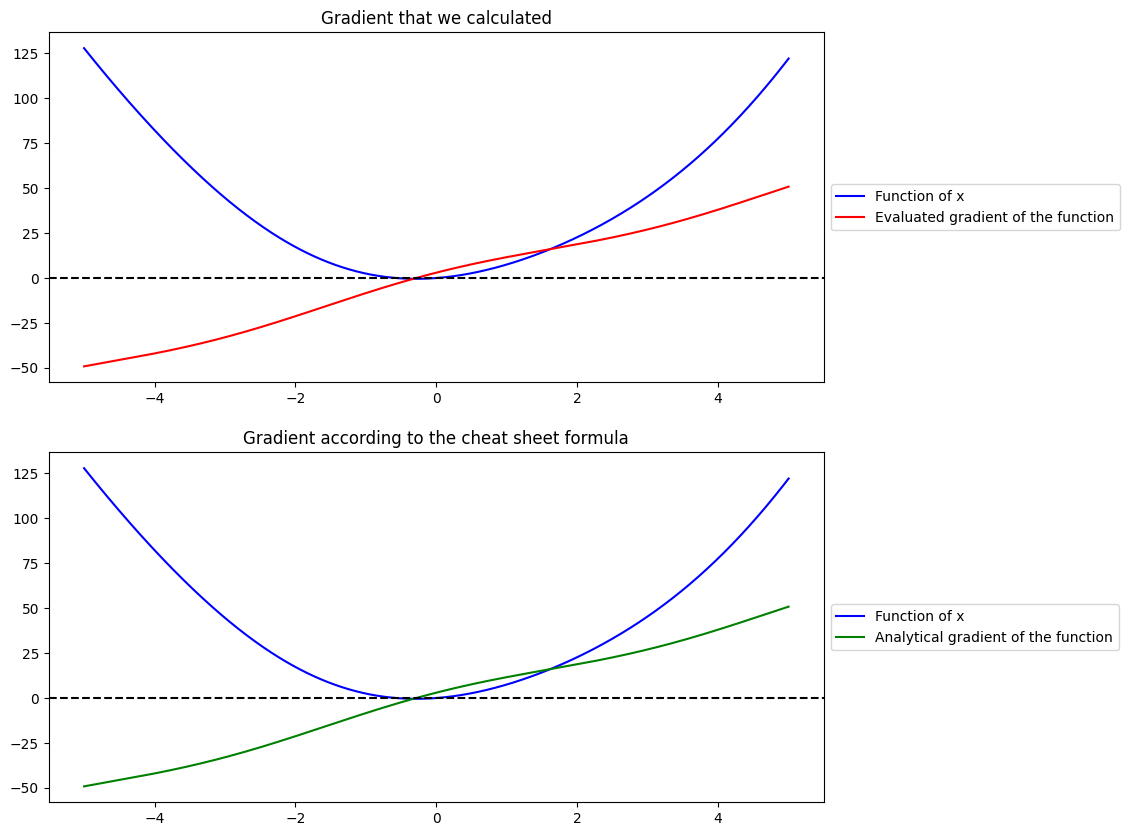

In [ ]:
def ytest(x):
    return 3 * np.sin(x) + 5 * x ** 2

# The analytical derivative of this function will be:
# 3 cos(x) + 10 x

xx = np.linspace(-5, 5, 500)

yy = ytest(xx)
grads_xx = gradient(ytest, xx, (-5, 5), plot=False, print_grads=False, δ_x=0.000001)


plt.figure(figsize=(10,10))
plt.subplot(2, 1, 1)

# First we plot the function and the derivative that we evaluated
plt.plot(xx, yy, 'b', label="Function of x")
plt.plot(xx, grads_xx, 'r', label="Evaluated gradient of the function")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.axhline(0, color='black', linestyle='dashed') # Showing the x axis
plt.title("Gradient that we calculated")

plt.subplot(2, 1, 2)

# Now we plot the function and the analytical derivate according to the cheat sheet
yy_analytic = 3 * np.cos(xx) + 10 * xx

plt.plot(xx, yy, 'b', label="Function of x")
plt.plot(xx, yy_analytic, 'g', label="Analytical gradient of the function")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.axhline(0, color='black', linestyle='dashed') # Showing the x axis
plt.title("Gradient according to the cheat sheet formula")

plt.show()


### 2.2 The product rule
If there are two functions $f(x)$ and $g(x)$, then the product rule is as follows: $\frac{d(f(x) \cdot g(x))}{dx} = g(x)\frac{d(f(x))}{dx} + f(x)\frac{d(g(x))}{dx}$.

Here is an example. Suppose we have the function $y = x^3\sin(x)$. We can see this is the product of two functions, $x^3$ and $\sin(x)$. Using the product rule, we can see that the derivative of this function is: $3x^2\sin(x) + x^3\cos(x)$. Let us verify this:

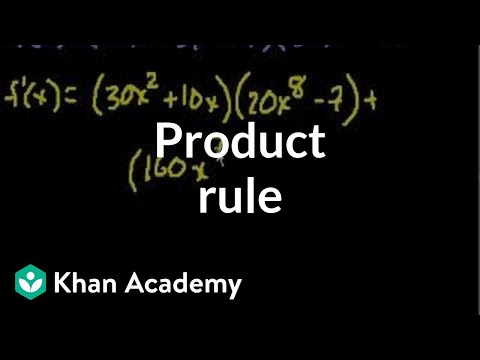

In [ ]:
YouTubeVideo("h78GdGiRmpM", width=800, height=500)

In [ ]:
def y5(x):
    return x ** 3 * np.sin(x)

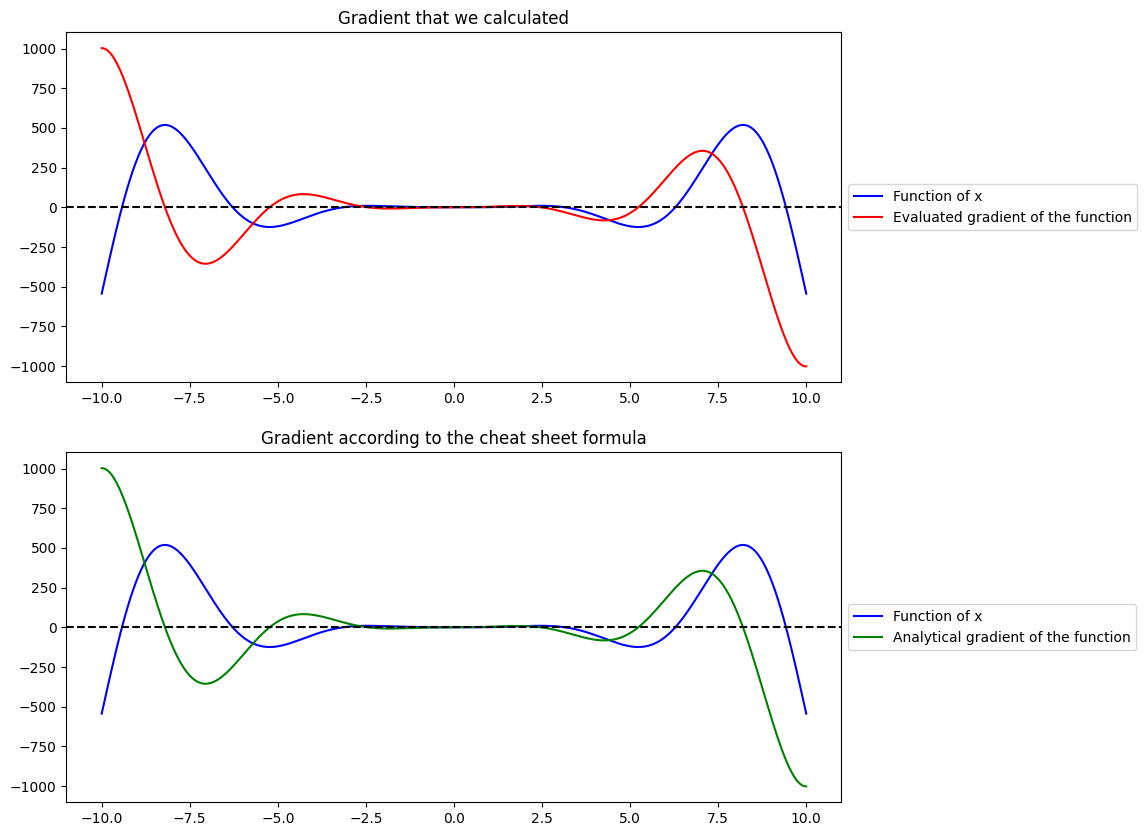

In [ ]:
xx = np.linspace(-10, 10, 500)

yy = y5(xx)
grads_xx = gradient(y5, xx, (-5, 5), plot=False, print_grads=False, δ_x=0.000001)


plt.figure(figsize=(10,10))
plt.subplot(2, 1, 1)

# First we plot the function and the derivative that we evaluated
plt.plot(xx, yy, 'b', label="Function of x")
plt.plot(xx, grads_xx, 'r', label="Evaluated gradient of the function")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.axhline(0, color='black', linestyle='dashed') # Showing the x axis
plt.title("Gradient that we calculated")

plt.subplot(2, 1, 2)

# Now we plot the function and the analytical derivate according to the cheat sheet
yy_analytic = 3 * xx ** 2 * np.sin(xx) + xx ** 3 * np.cos(xx)

plt.plot(xx, yy, 'b', label="Function of x")
plt.plot(xx, yy_analytic, 'g', label="Analytical gradient of the function")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.axhline(0, color='black', linestyle='dashed') # Showing the x axis
plt.title("Gradient according to the cheat sheet formula")

plt.show()

#### Question: What is the derivative of the function $y = \sin(x)\log(x)$? Can you show this graphically? Can you show that it is the same as the analytical gradient according to the cheat sheet and the product rule?

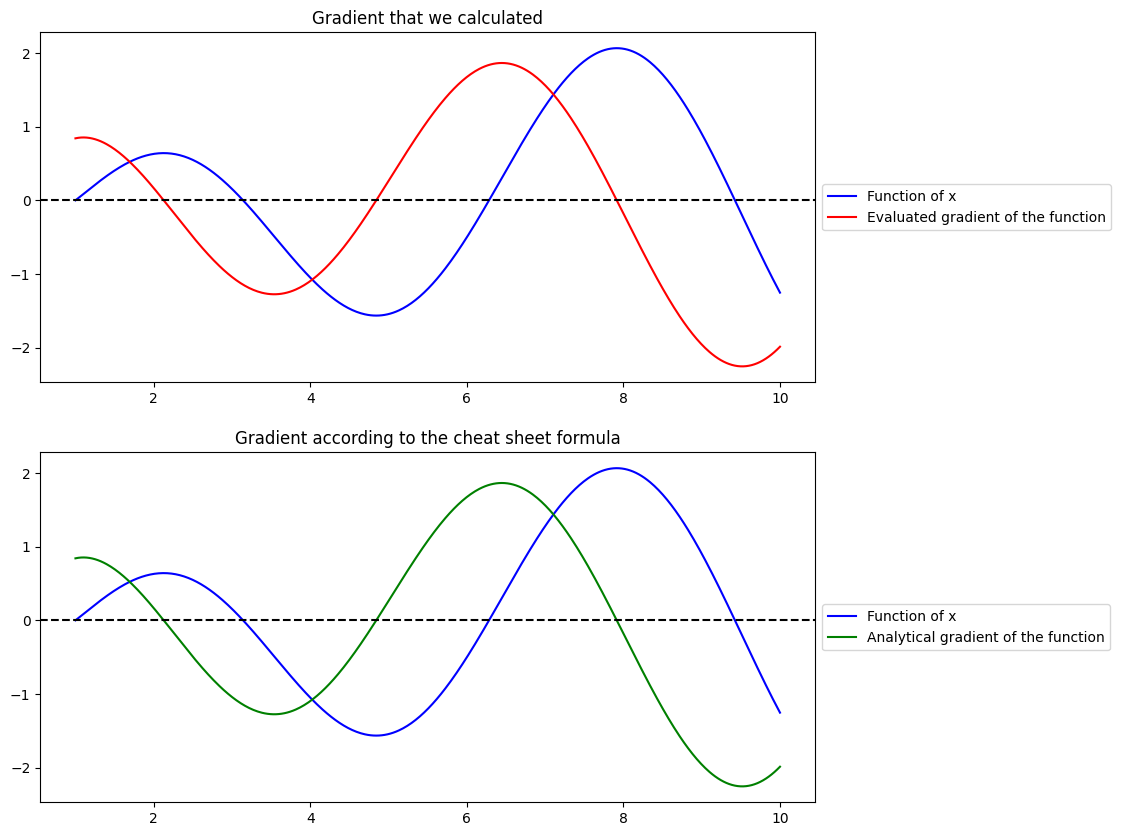

In [ ]:
## Your code here


def ytest(x):
    return np.sin(x) * np.log(x)

# The analytical derivative of this function will be:
# log(x) * cos(x) + (1 / x) * sin(x)

xx = np.linspace(1, 10, 500)

yy = ytest(xx)
grads_xx = gradient(ytest, xx, (-5, 5), plot=False, print_grads=False, δ_x=0.000001)


plt.figure(figsize=(10,10))
plt.subplot(2, 1, 1)

# First we plot the function and the derivative that we evaluated
plt.plot(xx, yy, 'b', label="Function of x")
plt.plot(xx, grads_xx, 'r', label="Evaluated gradient of the function")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.axhline(0, color='black', linestyle='dashed') # Showing the x axis
plt.title("Gradient that we calculated")

plt.subplot(2, 1, 2)

# Now we plot the function and the analytical derivate according to the cheat sheet
yy_analytic = np.log(xx) * np.cos(xx) + (1 / xx) * np.sin(xx)

plt.plot(xx, yy, 'b', label="Function of x")
plt.plot(xx, yy_analytic, 'g', label="Analytical gradient of the function")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.axhline(0, color='black', linestyle='dashed') # Showing the x axis
plt.title("Gradient according to the cheat sheet formula")

plt.show()



### 2.3 The quotient rule
If there are two functions $f(x)$ and $g(x)$, then the quotient rule is as follows: $\frac{d(\frac{f(x)}{g(x)})}{dx} = \frac{g(x)\frac{d(f(x))}{dx} - f(x)\frac{d(g(x))}{dx}}{g(x)^2}$.

Here is an example. Suppose we have the function $y = \frac{4x^2}{e^x}$. We can see this is the quotient of two functions, $4x^2$ and $e^x$. Using the quotient rule, we can see that the derivative of this function is: $\frac{8xe^x - 4x^2e^x}{e^{2x}}$. Let us verify this:

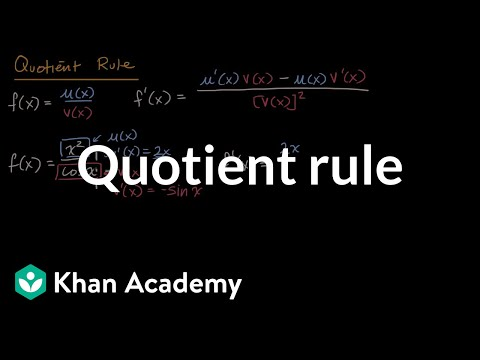

In [ ]:
YouTubeVideo("WqzY3xibFL8", width=800, height=500)

In [ ]:
def y6(x):
    return 4 * x ** 2 / np.exp(x)

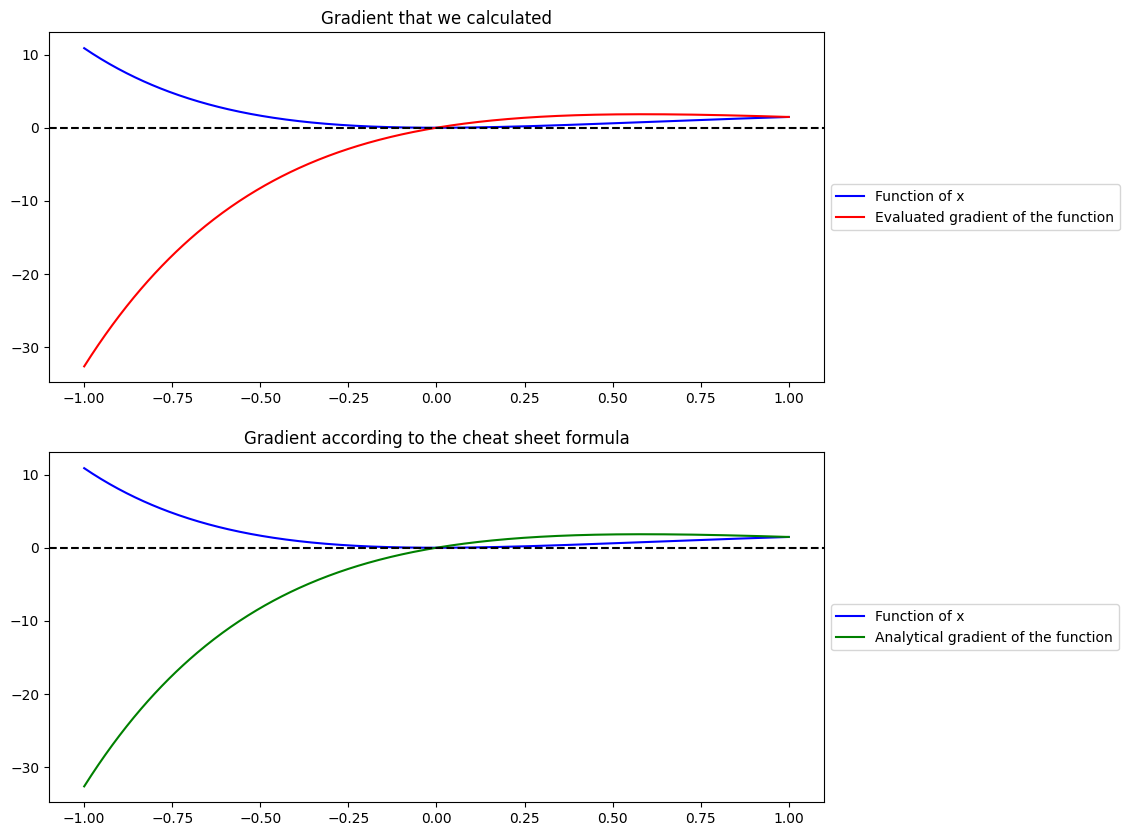

In [ ]:
xx = np.linspace(-1, 1, 500)

yy = y6(xx)
grads_xx = gradient(y6, xx, (-5, 5), plot=False, print_grads=False, δ_x=0.000001)


plt.figure(figsize=(10,10))
plt.subplot(2, 1, 1)

# First we plot the function and the derivative that we evaluated
plt.plot(xx, yy, 'b', label="Function of x")
plt.plot(xx, grads_xx, 'r', label="Evaluated gradient of the function")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.axhline(0, color='black', linestyle='dashed') # Showing the x axis
plt.title("Gradient that we calculated")

plt.subplot(2, 1, 2)

# Now we plot the function and the analytical derivate according to the cheat sheet
yy_analytic = (8 * xx * np.exp(xx) - 4 * xx ** 2 * np.exp(xx)) / (np.exp(2 * xx))

plt.plot(xx, yy, 'b', label="Function of x")
plt.plot(xx, yy_analytic, 'g', label="Analytical gradient of the function")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.axhline(0, color='black', linestyle='dashed') # Showing the x axis
plt.title("Gradient according to the cheat sheet formula")

plt.show()

### 2.4 The chain rule
This is probably the most important rule you have to remember! The chain rule is used when you have a **function within another function**. For example, let us say you have a function $f$ that takes the square of its argument. Let us say you have another function $g$ that takes the sin of its argument. In other words, $f(x) = x^2$ and $g(x) = \sin(x)$. Now, what would $f(g(x))$ be? If you think about it, it will be the square of the sin of x, so $f(g(x)) = (\sin(x))^2$.

The chain rule states that $\frac{d(f(g(x)))}{dx} = \frac{df}{dg} \times \frac{dg}{dx}$. This means we must first differentiate the outer function **with respect to the inner function** and then differentiate the inner function with respect to the variable. You can think about this as a chain of operations. For each function in a series of nested functions, you differentiate the outer function with respect to the inner, and multiply this by the derivative of the inner function with respect to the next inner function, and so on.

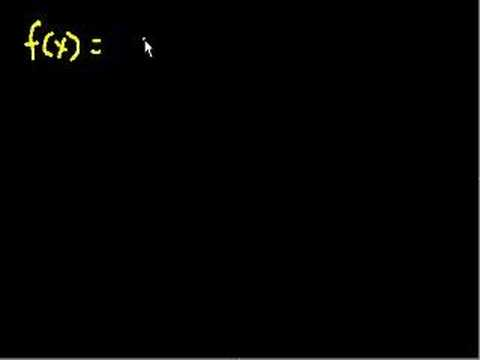

In [ ]:
YouTubeVideo("XIQ-KnsAsbg", width=800, height=500)

Let us use this principle to calculate the derivative of $y = (\sin(x))^2$.

The derivative of $(\sin(x))^2$ with respect to $\sin(x)$ is $2 \sin(x)$ following the power rule. And the derivative of $\sin(x)$ with respect to $x$ is $\cos(x)$. So, overall the derivative of $(\sin(x))^2$ with respect to $x$ is $2\sin(x)\cos(x)$.

In [ ]:
def y7(x):
    return ( np.sin(x) ) ** 2

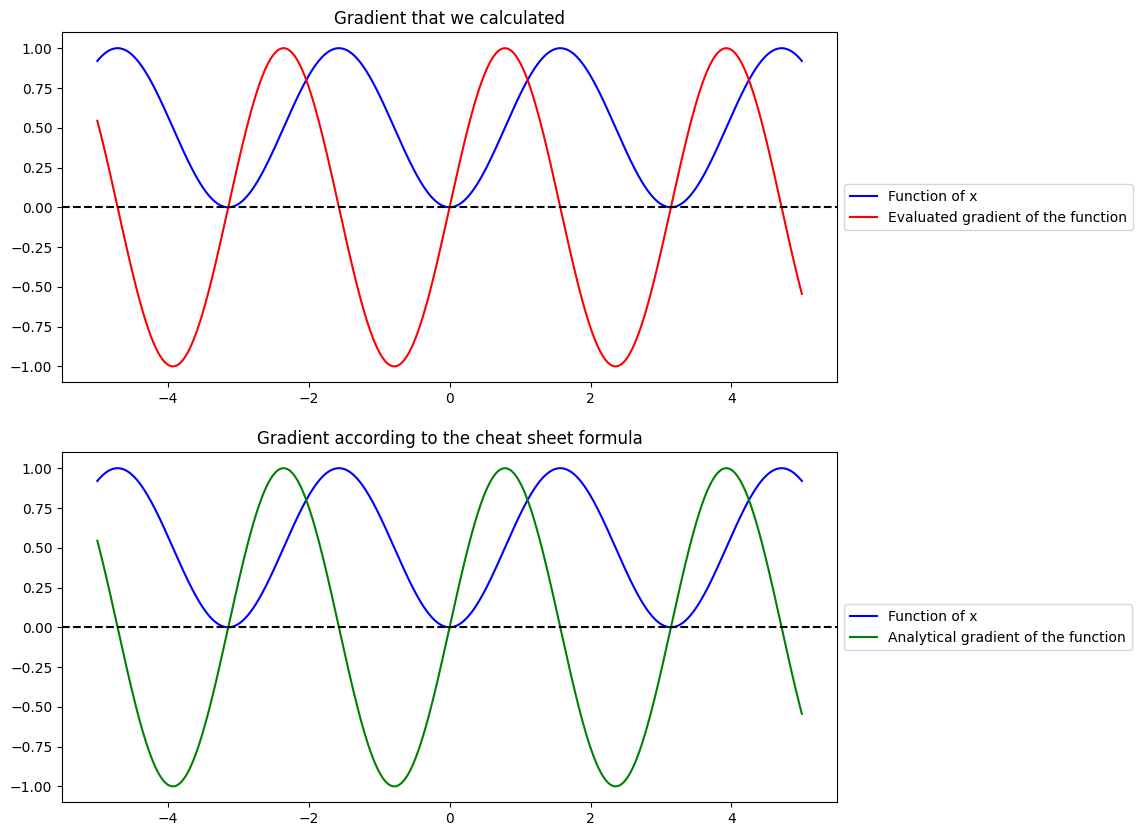

In [ ]:
xx = np.linspace(-5, 5, 5000)

yy = y7(xx)
grads_xx = gradient(y7, xx, (-5, 5), plot=False, print_grads=False, δ_x=0.000001)


plt.figure(figsize=(10,10))
plt.subplot(2, 1, 1)

# First we plot the function and the derivative that we evaluated
plt.plot(xx, yy, 'b', label="Function of x")
plt.plot(xx, grads_xx, 'r', label="Evaluated gradient of the function")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.axhline(0, color='black', linestyle='dashed') # Showing the x axis
plt.title("Gradient that we calculated")

plt.subplot(2, 1, 2)

# Now we plot the function and the analytical derivate according to the cheat sheet
yy_analytic = 2 * np.sin(xx) * np.cos(xx)

plt.plot(xx, yy, 'b', label="Function of x")
plt.plot(xx, yy_analytic, 'g', label="Analytical gradient of the function")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.axhline(0, color='black', linestyle='dashed') # Showing the x axis
plt.title("Gradient according to the cheat sheet formula")

plt.show()

### Question: In the previous example, you calculated the gradient of $(\sin(x))^2$ with respect to $x$. What is the gradient of $\sin(x^2)$ with respect to $x$? (Note the difference!). As before, plot the analytical and calculated gradients to compare them.

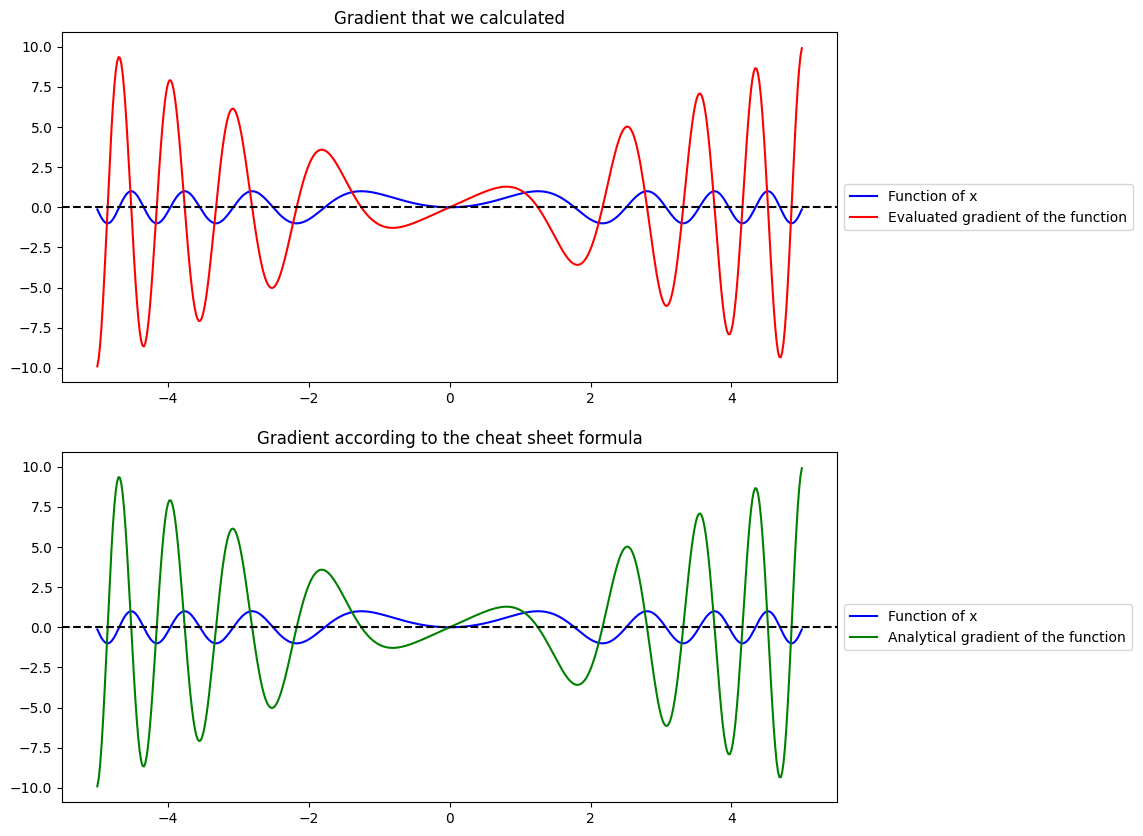

In [ ]:
## Your code here





def ytest(x):
    return np.sin(x ** 2)

# The analytical derivative of this function will be:
# 2x cos(x^2)

xx = np.linspace(-5, 5, 500)

yy = ytest(xx)
grads_xx = gradient(ytest, xx, (-5, 5), plot=False, print_grads=False, δ_x=0.000001)


plt.figure(figsize=(10,10))
plt.subplot(2, 1, 1)

# First we plot the function and the derivative that we evaluated
plt.plot(xx, yy, 'b', label="Function of x")
plt.plot(xx, grads_xx, 'r', label="Evaluated gradient of the function")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.axhline(0, color='black', linestyle='dashed') # Showing the x axis
plt.title("Gradient that we calculated")

plt.subplot(2, 1, 2)

# Now we plot the function and the analytical derivate according to the cheat sheet
yy_analytic = 2 * xx * np.cos(xx ** 2)

plt.plot(xx, yy, 'b', label="Function of x")
plt.plot(xx, yy_analytic, 'g', label="Analytical gradient of the function")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.axhline(0, color='black', linestyle='dashed') # Showing the x axis
plt.title("Gradient according to the cheat sheet formula")

plt.show()


